In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib

import ribasim

import ribasim_lumping
# from ribasim_lumping.ribasim_model_results import plot_results_basin_ribasim_model, \
#     plot_results_basins_ribasim_model, get_ribasim_basin_data_from_model, read_ribasim_model_results

import pandas as pd
import geopandas as gpd
import numpy as np
import pyarrow as pa

import warnings

warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None

c:\Users\NLTAND\OneDrive - Sweco AB\Algemeen-Tessa\Projecten\Python_Venv\ribasim_lumping\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# define network name, base dir
network_name            = "tki_zutphen_berkel"
# base_dir                = Path("..\\..\\..\\ribasim_lumping_data\\")
base_dir                = Path("..\\..\\..\\..\\..\\..\\ribasim_lumping_data\\")
# directory D-HYDRO basis calculations
dhydro_basis_dir        = Path(base_dir, network_name, "2_dhydro\\") # zelfde directory, want gebruik zelfde som
# directory D-HYDRO results calculations
dhydro_results_dir      = Path(base_dir, network_name, "2_dhydro\\") # zelfde directory, want gebruik zelfde som
# directory results
results_dir             = Path(base_dir, network_name, "3_ribasim\\")
# batch file used to calculate volume D-Hydro module per GridPoint
dhydro_volume_tool_bat_file = Path(r"c:\Program Files\Deltares\D-HYDRO Suite 2023.03 1D2D\plugins\DeltaShell.Dimr\kernels\x64\dflowfm\scripts\run_dfm_volume_tool.bat")
dhydro_volume_tool_increment = 0.1
# link to ribasim_executable
path_ribasim_executable = "..\\..\\..\\ribasim_cli\\bin\\ribasim.exe"

In [4]:
# Create networkanalysis
network = ribasim_lumping.create_ribasim_lumping_network(
    base_dir=base_dir,
    name=network_name,
    dhydro_basis_dir=dhydro_basis_dir,
    dhydro_results_dir=dhydro_results_dir,
    results_dir=results_dir,
    path_ribasim_executable=path_ribasim_executable,
    crs=28992
)
# network.export_to_geopackage()

In [5]:
# Load areas (discharge units: afwaterende eenheden)
areas_dir               = Path(base_dir, network_name, "1_data", "areas")
areas_file_name         = f"{network_name}_afw_eenheden.shp"
areas_id_column         = "GFEIDENT"
network.read_areas(
    areas_file_path=Path(areas_dir, areas_file_name), 
    areas_id_column=areas_id_column
)

 - areas (307x)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


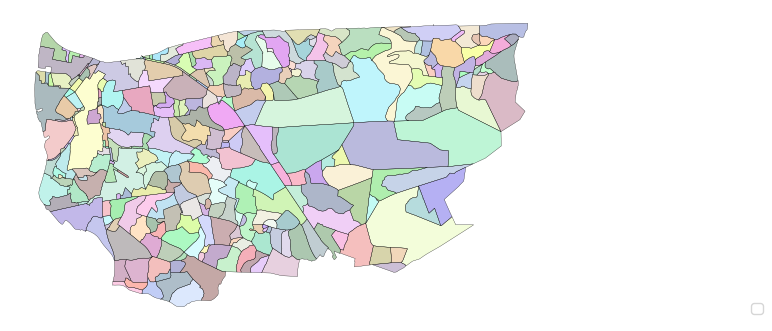

In [9]:
network.plot();

In [10]:
# Read network data and extract all objects (weirs/pumps/laterals/confluences/bifurcations)
# network.add_basis_network(
#     source_type='dhydro',
#     set_name="winter",
#     set_start_month=10,
#     set_start_day=1,
#     model_dir=Path(dhydro_basis_dir, "afvoergolf"),
#     simulation_name="tki_zuthpen_berkel_afvoergolf.dsproj_data",
#     dhydro_volume_tool_bat_file=dhydro_volume_tool_bat_file, 
#     dhydro_volume_tool_force=True,
#     dhydro_volume_tool_increment=dhydro_volume_tool_increment
# );
network.add_basis_network(
    source_type='dhydro',
    set_name="winter",
    set_start_month=10,
    set_start_day=1,
    model_dir=Path(dhydro_basis_dir, "afvoergolf"),
    simulation_name="data",
    dhydro_volume_tool_bat_file=dhydro_volume_tool_bat_file, 
    dhydro_volume_tool_force=True,
    dhydro_volume_tool_increment=dhydro_volume_tool_increment
);
# network.add_basis_network(   
#     source_type='dhydro',
#     set_name='zomer', 
#     set_start_month=4,
#     set_start_day=1,
#     model_dir=Path(dhydro_basis_dir, "zomer"),
#     simulation_name="tki_zuthpen_berkel_basis.dsproj_data",
#     dhydro_volume_tool_bat_file=dhydro_volume_tool_bat_file, 
#     dhydro_volume_tool_force=True,
#     dhydro_volume_tool_increment=0.1
# );

  - MDU-file: ..\..\..\..\..\..\ribasim_lumping_data\tki_zutphen_berkel\2_dhydro\afvoergolf\data\FlowFM\input\FlowFM.mdu
  - network: network-nodes (599x) branches (623x) nodes (2768x) edges (2792)
  - structures: culvert (435x), compound (532x), weir (48x), pump (6x), bridge (27x), universalWeir (16x), orifice (2x), culverts (435x) weirs (48x) pumps (6x->4x) bridges (27x) universalWeirs (16x) orifices (2x) 
  - external forcing (locations): boundaries (8x) laterals (362x)
  - external forcing (data): boundaries laterals
  - volume_tool: new level-volume dataframe created: PerGridpoint_volume.nc


(<Figure size 700x1500 with 1 Axes>, <Axes: >)

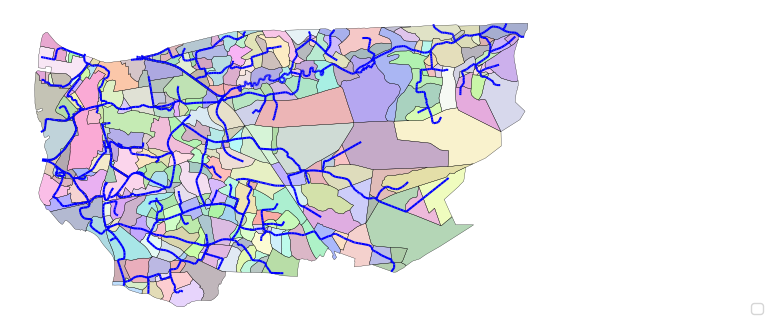

In [11]:
network.plot()

In [12]:
# Select simulation sets and extract all data using xugrid/ugrid
# network.add_simulation_set(
#     source_type='dhydro',
#     set_name="winter",
#     model_dir=Path(dhydro_results_dir, "winter"),
#     simulation_names=["tki_zuthpen_berkel_basis.dsproj_data"],
#     simulation_ts=pd.date_range("2000-01-06 23:00", periods=9, freq="6D"),
# );
network.add_simulation_set(
    source_type='dhydro',
    set_name="winter",
    model_dir=Path(dhydro_results_dir, "winter"),
    simulation_names=["data"],
    simulation_ts=pd.date_range("2000-01-06 23:00", periods=9, freq="6D"),
);
# network.add_simulation_data(
#     source_type='dhydro',
#     set_name="zomer",
#     model_dir=Path(dhydro_results_dir, "winter"),
#     simulation_names=["tki_zuthpen_berkel_basis.dsproj_data"],
#     simulation_ts=pd.date_range("2000-01-06 23:00", periods=9, freq="6D"),
# );

Read D-HYDRO simulations sets
 - Simulation set (winter): data | Timestamps: 9 | his.nc and map.nc
  - MDU-file: ..\..\..\..\..\..\ribasim_lumping_data\tki_zutphen_berkel\2_dhydro\winter\data\FlowFM\input\FlowFM.mdu


In [14]:
# network.change_branches_direction(
#     branche_ids=[]
# )

#### OPZETTEN SIMULATIE

In [15]:
simulation_code = "tki_zutphen_berkel"

In [16]:
# Definition settings
settings_temporal_variation = False
# in case of no temporal variation
set_name = 'winter'

# Defition Lateral inflow
use_laterals_basis_network = False
use_laterals_areas = True
use_laterals_homogeneous = False

if use_laterals_areas:
    areas_laterals_path = Path(base_dir, network_name, "1_data", "laterals", "laterals_areas.csv")
    network.read_areas_laterals(areas_laterals_path)

# Definition initial water levels (refer to simulation name and index timestep)
initial_waterlevels_simulation_name = "tki_zuthpen_berkel_afvoergolf.dsproj_data"
initial_waterlevels_timestep = 3

In [96]:
# test boundary data
use_boundaries_basis_network = False
use_boundaries_csv = True
use_boundaries_homogeneous = False

if use_boundaries_csv:
    boundaries_csv_path = Path(base_dir, network_name, "1_data", "boundaries", "boundary_timeseries.csv")
    network.read_boundaries_csv(boundaries_csv_path,  skiprows=1)

<Axes: xlabel='time'>

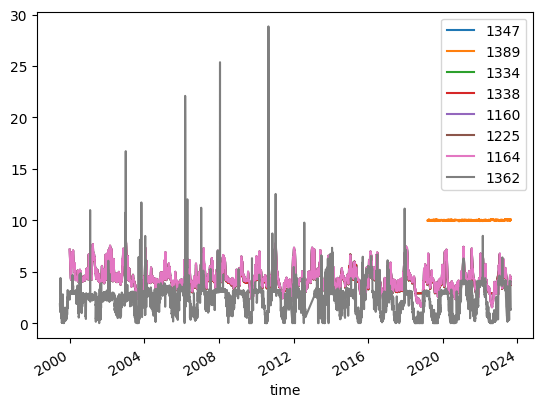

In [97]:
network.boundaries_csv_data.plot()

In [19]:
# Define locations where the network should be split into Ribasim basins:
network.add_split_nodes(
    weirs=True,
    pumps=True,
    uniweirs=True,
    orifices=True,
    structures_ids_to_include=[
        'kdu_DR80760025', # duiker vispassage bovenstrooms
        'kdu_DR80770020', # duiker afvoergebiedje noordzijde Berkel
        'kdu_DR84930010', # duiker met terugslagklep Zutphen Noorderhaven (parallel aan gemaal)
        'kdu_DR80950033', # duikers voor wijk Leesten
        'kdu_DR80940046', 'kdu_DR80950043', 'kdu_DR80950151', # duikers voor wijk Zuidwijken
        'kdu_DR80950103',
        'kdu_DR80740070', # inlaat twentekanaal
    ], 
    structures_ids_to_exclude=[
        'BCAL_3', 'BCAL_11', # stuwen voor hoogwaterafvoer De Berkel
        'BBypass_Besselink_1', 'BBypass_Besselink_2', 'BBypass_Besselink_3', 'BBypass_Besselink_4', 'BBypass_Besselink_5', # visdrempels vispassage De Berkel
        'kst_ST80950035', # verwarrende stuw ivm afwaterende eenheid (Zutphen: Leesten)
        'kst_ST84930001', # verwarrende stuw ivm afwaterende eenheid (Zutphen: Noorderhaven)
        # 'kst_ST80830045', # weir tussen uitstroompunten Zutphen
        # 'kst_ST80820031', 'kst_ST80820042', # test
    ], 
    edge_ids_to_include=[1801],
);

70 split locations
 - pump: 4
 - weir: 46
 - orifice: 2
 - universalWeir: 9
 - culvert: 9


In [20]:
split_node_type_conversion = dict(
    weir="TabulatedRatingCurve",
    universalWeir="TabulatedRatingCurve",
    pump="Pump",
    culvert="TabulatedRatingCurve",
    edge="ManningResistance",
    orifice="Outlet",
    boundary_connection="ManningResistance"
)
# specify translation for specific split_nodes to ribasim-nodes
split_node_id_conversion = dict(
    kdu_DR80740070='ManningResistance',
    # duikers voor wijk Zuidwijken
    kdu_DR80940046='ManningResistance', 
    kdu_DR80950043='ManningResistance', 
    kdu_DR80950151='ManningResistance', 
)

In [21]:
network.generate_ribasim_lumping_network(
    simulation_code=simulation_code,
    split_node_type_conversion=split_node_type_conversion,
    split_node_id_conversion=split_node_id_conversion,
);

Create Ribasim network using Network and Split nodes:
 - create network graph from nodes (2768) and edges (2792x)
 - split network graph at split locations (70x)
 - define numbers Ribasim-Basins (52x) and join edges/nodes
 - check whether each split location results in a split (0 not used)
 - create final locations Ribasim-Basins (52)
 - define for each Ribasim-Basin the related basin area (47x)
 - create connections between Basins and split locations (140x)
 - create Ribasim-Edges between Boundaries and Basins
 - regenerate node-ids Ribasim-Nodes and Ribasim-Edges
 - define Ribasim-Nodes types based on input conversion table(s)
Exporting to geopackage:
 - available: areas, branches, nodes, edges, pumps, weirs, orifices, bridges, culverts, uniweirs, basin_areas, split_nodes, basins, basin_connections, laterals, boundaries, boundary_connections, 
 - not available: stations, node_h, node_a, node_v, basin_h, basin_a, basin_v, 
Export location: ..\..\..\..\..\..\ribasim_lumping_data\tki_zu

In [104]:
ribasim_model = network.generate_ribasim_model_complete(
    set_name=set_name,
    use_laterals_basis_network=use_laterals_basis_network,
    use_laterals_areas=use_laterals_areas,
    use_laterals_homogeneous=use_laterals_homogeneous,
    use_boundaries_csv = use_boundaries_csv,
    initial_waterlevels_simulation_name=initial_waterlevels_simulation_name,
    initial_waterlevels_timestep=initial_waterlevels_timestep,
    saveat=3600,
)

laterals
 - laterals based on lateral inflow (timeseries) per area
boundaries
- boundaries based on timeseries
 x basin_node_id 110: no discharge over split_node (weir): kst_ST80820070 in D-HYDRO simulation
 x basin_node_id 117: no discharge over split_node (weir): kst_ST84810015 in D-HYDRO simulation
 x basin_node_id 129: no discharge over split_node (weir): kst_ST80810010 in D-HYDRO simulation
 x basin_node_id 136: no discharge over split_node (universalWeir): 1500 in D-HYDRO simulation
 x basin_node_id 130: no discharge over split_node (universalWeir): 1506 in D-HYDRO simulation
 x basin_node_id 129: no discharge over split_node (universalWeir): 1511 in D-HYDRO simulation
Generate ribasim model: nodes (137x), edges (155x), basins (52x)level


ValidationError: 1 validation error for LevelBoundary
time.df
  Value error, Error while coercing 'LevelBoundaryTimeSchema' to type <class 'ribasim.models.LevelBoundaryTime'>: Could not coerce <class 'pandas.core.frame.DataFrame'> data_container into type <class 'ribasim.models.LevelBoundaryTime'>
      column  index         failure_case
0       time      0  1999-06-23 23:00:00
1       time      1  1999-06-24 23:00:00
2       time      2  1999-06-25 23:00:00
3       time      3  1999-06-26 23:00:00
4       time      4  1999-06-27 23:00:00
...      ...    ...                  ...
26476   flow   8822                2.739
26477   flow   8823                2.135
26478   flow   8824                1.891
26479   flow   8825                1.283
26480   flow   8826                1.371

[26481 rows x 3 columns] [type=value_error, input_value=                    time ...
[8827 rows x 3 columns], input_type=DataFrame]
    For further information visit https://errors.pydantic.dev/2.5/v/value_error

In [34]:
network.boundaries_gdf.head(3)

,boundary,boundary_node_id,name,geometry,quantity,forcingfile,index_right,node_no,ribasim_type
0,1,1,1164,POINT (210032.131 460826.719),waterlevelbnd,FlowFM_boundaryconditions1d.bc,0,989,LevelBoundary
1,2,2,1225,POINT (209996.409 461608.505),waterlevelbnd,FlowFM_boundaryconditions1d.bc,1,1280,LevelBoundary
2,3,3,1338,POINT (211260.743 463847.467),waterlevelbnd,FlowFM_boundaryconditions1d.bc,2,1670,LevelBoundary


In [ ]:
network.laterals_gdf.head(3)

In [ ]:
network.basins_gdf.head(3)

In [ ]:
network.laterals_gdf.head(3)

In [ ]:
ribasim_model.level_boundary.static

In [ ]:
ribasim_model.basin.time

In [26]:
ribasim_model.flow_boundary

FlowBoundary(static)